# **Загрязнение воздуха в городе Сеул, Южная Корея**

Исходный датасет - https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul/data

**Основные цели проекта:**

1.   Выявление общей тендеции изменения качества воздуха в Сеуле с течением времени. Сравнение качесва воздуха с нормативными показателями.
2.   Анализ изменений в составе воздуха за определенные промежутки времени:

*   анализ суточных колебаний изменений концентраций загрязняющих веществ.
*   анализ сезонных колебаний.

3.   Исследование качества воздуха в районах Сеула. В частности, выявление самого "грязного" района и самого "чистого" района. Построение карты качества воздуха в Сеуле.
4.   Анализ корреляций между загрязняющими веществами.
5.   Прогназирование уровня загрязнения.










**Актуальность проекта:** Проект по исследованию качества воздуха в Сеуле нужен, чтобы понять, насколько город безопасен для жизни и здоровья людей. Загрязнение воздуха влияет на лёгкие, сердце и общее самочувствие, особенно у детей и пожилых. Это важно для властей, чтобы принимать меры: ограничивать вредные производства, развивать общественный транспорт и зелёные зоны. Туристы и бизнес тоже заинтересованы — чистый воздух делает город привлекательнее. Учёные могут использовать данные для прогнозов и новых технологий мониторинга. В итоге такой проект помогает сделать Сеул комфортнее и безопаснее для всех.

**Датасет составлен на основе официальной публичной информации, предоставляемой правительством Южной Кореи, поэтому полученные в проекте результаты можно считать адекватными.**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import ScalarMappable
import seaborn as sns
import numpy as np
import geopandas as gpd
import folium
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
df_summary = pd.read_csv('Measurement_summary.csv')
df_info = pd.read_csv('Measurement_info.csv')
df_item_info = pd.read_csv('Measurement_item_info.csv')
df_station_info = pd.read_csv('Measurement_station_info.csv')

## ***Краткий обозор датасета***

## **Анализ файла Measurement_summary.csv**

In [16]:
print(df_summary.head())

   Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2  0.004  0.056  0.002  1.2  70.0   59.0  
3  0.004  0.056  0.002  1.2  70.0   58.0  
4  0.003  0.051  0.002  1.2  69.0   61.0  


In [17]:
print(df_summary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB
None


In [18]:
print(df_summary.describe())

        Station code       Latitude      Longitude            SO2  \
count  647511.000000  647511.000000  647511.000000  647511.000000   
mean      113.000221      37.553484     126.989340      -0.001795   
std         7.211315       0.053273       0.078790       0.078832   
min       101.000000      37.452357     126.835151      -1.000000   
25%       107.000000      37.517528     126.927102       0.003000   
50%       113.000000      37.544962     127.004850       0.004000   
75%       119.000000      37.584848     127.047470       0.005000   
max       125.000000      37.658774     127.136792       3.736000   

                 NO2             O3             CO           PM10  \
count  647511.000000  647511.000000  647511.000000  647511.000000   
mean        0.022519       0.017979       0.509197      43.708051   
std         0.115153       0.099308       0.405319      71.137342   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%         0.016000       0.0080

In [19]:
print(df_summary.isnull().sum())

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


## **Анализ файла Measurement_info.csv**

In [20]:
print(df_info.head())

   Measurement date  Station code  Item code  Average value  Instrument status
0  2017-01-01 00:00           101          1          0.004                  0
1  2017-01-01 00:00           101          3          0.059                  0
2  2017-01-01 00:00           101          5          1.200                  0
3  2017-01-01 00:00           101          6          0.002                  0
4  2017-01-01 00:00           101          8         73.000                  0


In [22]:
print(df_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885066 entries, 0 to 3885065
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 148.2+ MB
None


In [21]:
print(df_info.describe())

       Station code     Item code  Average value  Instrument status
count  3.885066e+06  3.885066e+06   3.885066e+06       3.885066e+06
mean   1.130002e+02  5.333333e+00   1.161132e+01       1.471890e-01
std    7.211310e+00  2.748737e+00   3.816098e+01       1.021642e+00
min    1.010000e+02  1.000000e+00  -1.000000e+00       0.000000e+00
25%    1.070000e+02  3.000000e+00   1.200000e-02       0.000000e+00
50%    1.130000e+02  5.500000e+00   7.000000e-02       0.000000e+00
75%    1.190000e+02  8.000000e+00   1.500000e+01       0.000000e+00
max    1.250000e+02  9.000000e+00   6.256000e+03       9.000000e+00


In [20]:
print(df_info.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64


## **Анилиз файла Measurement_item_info.csv**

In [23]:
print(df_item_info.head())

   Item code Item name Unit of measurement  Good(Blue)  Normal(Green)  \
0          1       SO2                 ppm        0.02           0.05   
1          3       NO2                 ppm        0.03           0.06   
2          5        CO                 ppm        2.00           9.00   
3          6        O3                 ppm        0.03           0.09   
4          8      PM10       Mircrogram/m3       30.00          80.00   

   Bad(Yellow)  Very bad(Red)  
0         0.15            1.0  
1         0.20            2.0  
2        15.00           50.0  
3         0.15            0.5  
4       150.00          600.0  


In [24]:
print(df_item_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item code            6 non-null      int64  
 1   Item name            6 non-null      object 
 2   Unit of measurement  6 non-null      object 
 3   Good(Blue)           6 non-null      float64
 4   Normal(Green)        6 non-null      float64
 5   Bad(Yellow)          6 non-null      float64
 6   Very bad(Red)        6 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 468.0+ bytes
None


In [25]:
print(df_item_info.describe())

       Item code  Good(Blue)  Normal(Green)  Bad(Yellow)  Very bad(Red)
count   6.000000    6.000000       6.000000     6.000000       6.000000
mean    5.333333    7.846667      20.700000    40.083333     192.250000
std     3.011091   12.325430      32.047072    61.171960     279.551382
min     1.000000    0.020000       0.050000     0.150000       0.500000
25%     3.500000    0.030000       0.067500     0.162500       1.250000
50%     5.500000    1.015000       4.545000     7.600000      26.000000
75%     7.500000   11.750000      28.500000    60.000000     387.500000
max     9.000000   30.000000      80.000000   150.000000     600.000000


In [26]:
print(df_item_info.isnull().sum())

Item code              0
Item name              0
Unit of measurement    0
Good(Blue)             0
Normal(Green)          0
Bad(Yellow)            0
Very bad(Red)          0
dtype: int64


## **Анилиз файла Measurement_station_info.csv**

In [27]:
print(df_station_info.head())

   Station code Station name(district)  \
0           101              Jongno-gu   
1           102                Jung-gu   
2           103             Yongsan-gu   
3           104           Eunpyeong-gu   
4           105           Seodaemun-gu   

                                             Address   Latitude   Longitude  
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008  
1  15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  37.564263  126.974676  
2  136, Hannam-daero, Yongsan-gu, Seoul, Republic...  37.540033  127.004850  
3  215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  37.609823  126.934848  
4  32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  37.593742  126.949679  


In [28]:
print(df_station_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Station code            25 non-null     int64  
 1   Station name(district)  25 non-null     object 
 2   Address                 25 non-null     object 
 3   Latitude                25 non-null     float64
 4   Longitude               25 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB
None


In [29]:
print(df_station_info.describe())

       Station code   Latitude   Longitude
count     25.000000  25.000000   25.000000
mean     113.000000  37.553486  126.989339
std        7.359801   0.054373    0.080413
min      101.000000  37.452357  126.835151
25%      107.000000  37.517528  126.927102
50%      113.000000  37.544962  127.004850
75%      119.000000  37.584848  127.047470
max      125.000000  37.658774  127.136792


In [30]:
print(df_station_info.isnull().sum())

Station code              0
Station name(district)    0
Address                   0
Latitude                  0
Longitude                 0
dtype: int64


## **I. Географический анализ загрязнения воздуха в Сеуле**

In [31]:
df = pd.merge(df_summary, df_station_info, on=['Station code', 'Address', 'Latitude', 'Longitude'], how='left')
df['Measurement date'] = pd.to_datetime(df['Measurement date'])
df['Year'] = df['Measurement date'].dt.year
df['Month'] = df['Measurement date'].dt.month
df['Day'] = df['Measurement date'].dt.day
df['Hour'] = df['Measurement date'].dt.hour

In [91]:
district_pm25 = df.groupby('Station name(district)')['PM2.5'].mean().sort_values(ascending=False)
district_pm10 = df.groupby('Station name(district)')['PM10'].mean().sort_values(ascending=False)

<ipython-input-66-eb485c7988bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_pm25.index, x=district_pm25.values, palette='Reds_r')


Text(0, 0.5, 'Район')

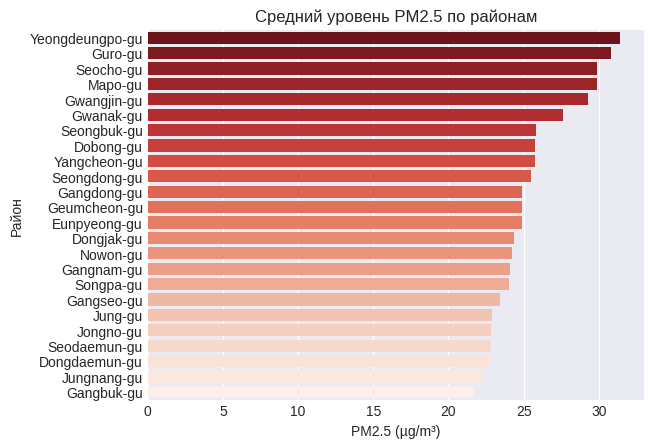

In [66]:
sns.barplot(y=district_pm25.index, x=district_pm25.values, palette='Reds_r')
plt.title('Средний уровень PM2.5 по районам')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Район')

<ipython-input-67-67783aa7a94c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_pm10.index, x=district_pm10.values, palette='Reds_r')


Text(0, 0.5, '')

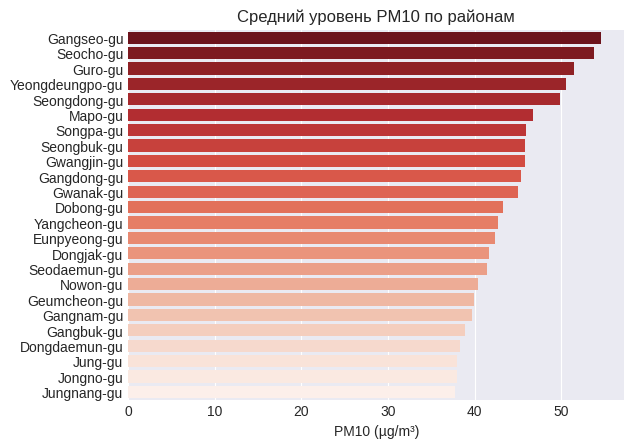

In [67]:
sns.barplot(y=district_pm10.index, x=district_pm10.values, palette='Reds_r')
plt.title('Средний уровень PM10 по районам')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('')

Анализ превышений норм

In [68]:
norms = {'PM2.5': 35, 'PM10': 50}
district_exceed = df.groupby('Station name(district)').agg(PM25_exceed=('PM2.5', lambda x: (x > norms['PM2.5']).mean() * 100), PM10_exceed=('PM10', lambda x: (x > norms['PM10']).mean() * 100)).sort_values('PM25_exceed', ascending=False)

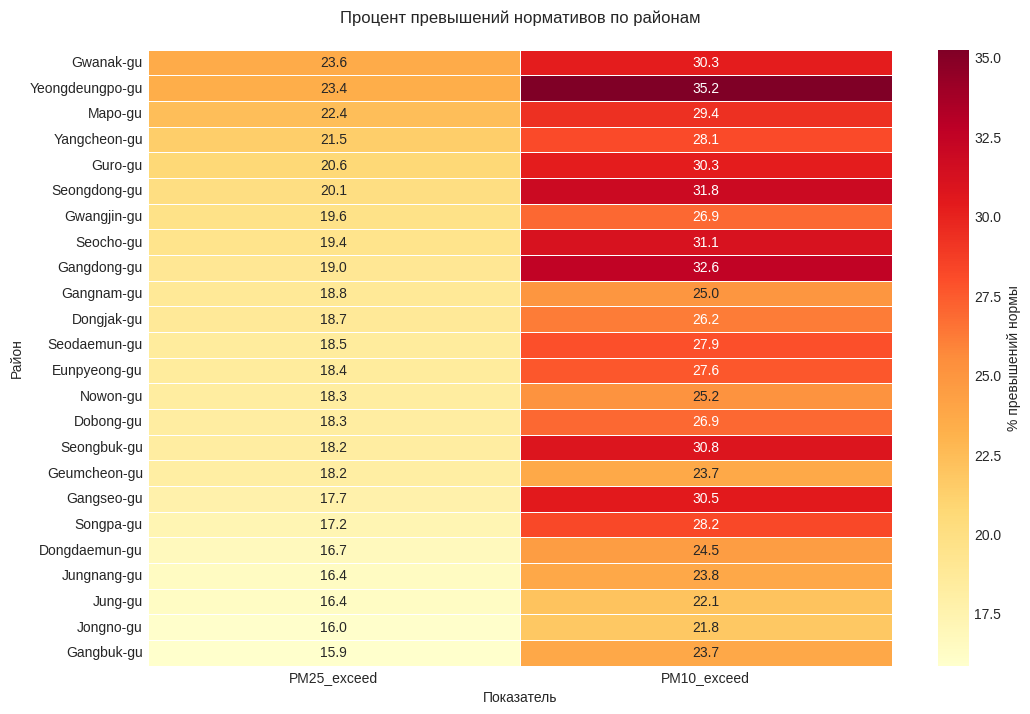

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(district_exceed,annot=True,fmt='.1f',cmap='YlOrRd',linewidths=0.5,cbar_kws={'label': '% превышений нормы'})
plt.title('Процент превышений нормативов по районам', pad=20)
plt.ylabel('Район')
plt.xlabel('Показатель')
plt.show()

In [70]:
!pip install cartopy
import cartopy

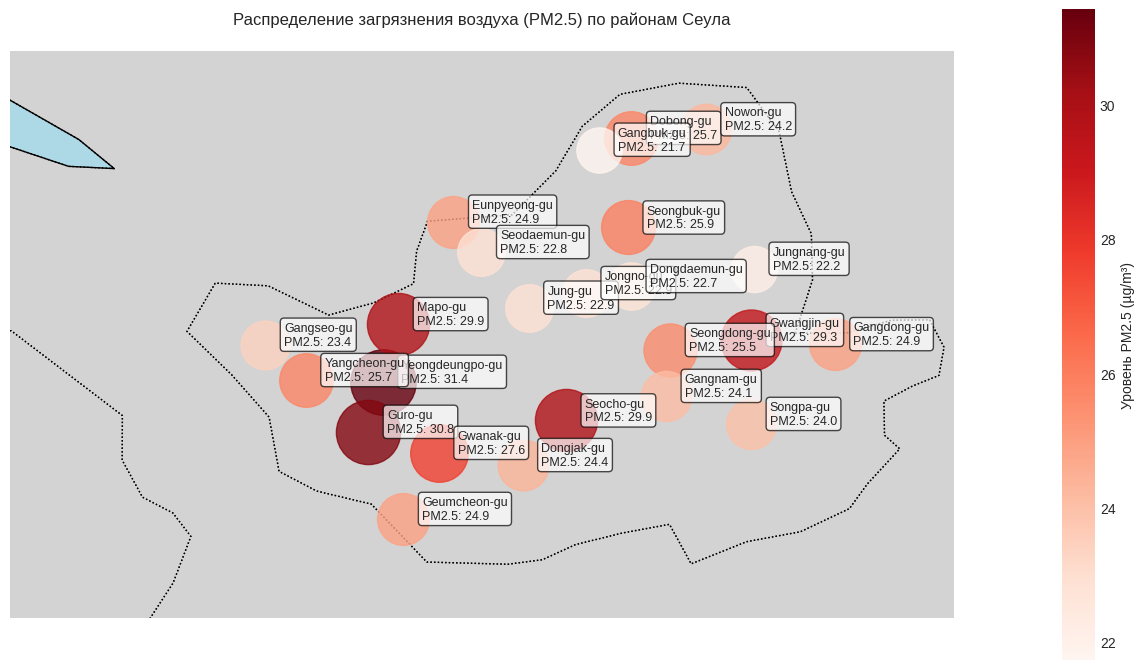

In [98]:
district_avg = df.groupby('Station name(district)')[['PM2.5', 'PM10']].mean()
district_avg = district_avg.sort_values('PM2.5', ascending=False)
district_data = pd.merge(district_avg.reset_index(),df_station_info[['Station name(district)', 'Latitude', 'Longitude']].drop_duplicates(),on='Station name(district)')

plt.figure(figsize=(14, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([126.7, 127.2, 37.4, 37.7], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

norm = Normalize(vmin=district_data['PM2.5'].min(), vmax=district_data['PM2.5'].max())
cmap = plt.get_cmap('Reds')

for idx, row in district_data.iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o',color=cmap(norm(row['PM2.5'])),markersize=row['PM2.5']*1.5,transform=ccrs.PlateCarree(),alpha=0.8)
    ax.text(row['Longitude'] + 0.01, row['Latitude'],f"{row['Station name(district)']}\nPM2.5: {row['PM2.5']:.1f}",fontsize=9,transform=ccrs.PlateCarree(),bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Уровень PM2.5 (µg/m³)')
plt.title('Распределение загрязнения воздуха (PM2.5) по районам Сеула', pad=20)
plt.show()

##**II. Анализ корреляций между загрязняющими веществами.**

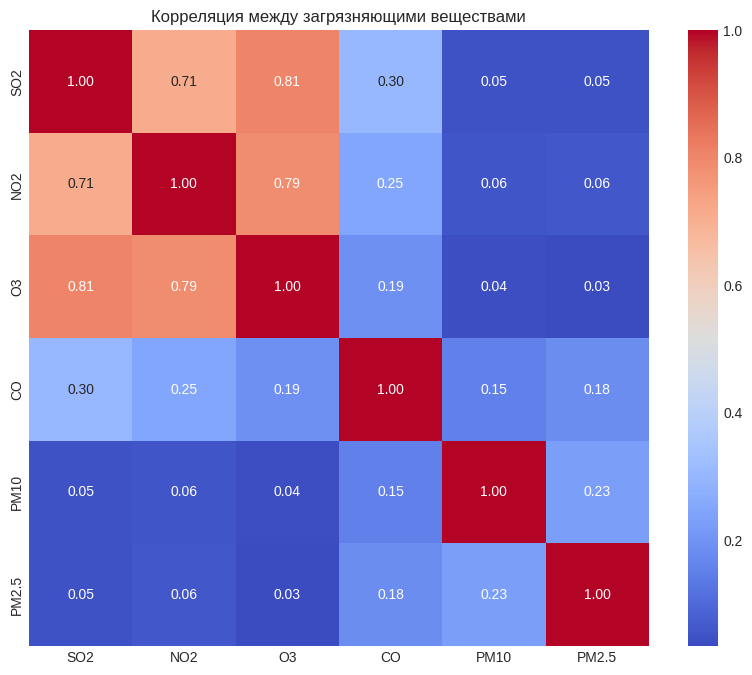

In [74]:
corr_matrix = df[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между загрязняющими веществами')
plt.show()

Достаточно большая корреляция между NO2 SO2 и O3 необычна и естественными химичискими реакциями не обусловлена.